# MNIST Handwritten Digit Classifier - Classify the Number

Given a dataset of 6,000 images of handwritten digits, train a neural network to identify the number.

In [21]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load and split data into training and test sets.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Show one example digit.

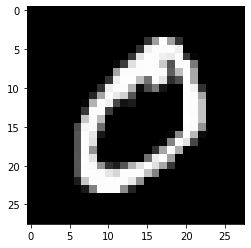

In [4]:
plt.imshow(X_train[1], cmap='gray')

In [5]:
y_train[1]

0

Prepare features and target for training.

In [6]:
image_height,image_width = 28, 28

X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Train a neural network with 2 hidden layers of 64 nodes each.

In [8]:
model = Sequential()

In [9]:
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2818 - accuracy: 0.9178 - val_loss: 0.1437 - val_accuracy: 0.9563
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1231 - accuracy: 0.9629 - val_loss: 0.1092 - val_accuracy: 0.9671
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9734 - val_loss: 0.0949 - val_accuracy: 0.9719
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0690 - accuracy: 0.9785 - val_loss: 0.0852 - val_accuracy: 0.9741
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9830 - val_loss: 0.0841 - val_accuracy: 0.9747
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.0813 - val_accuracy: 0.9749
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0945 - val_accuracy:

Evaluate the model performance.

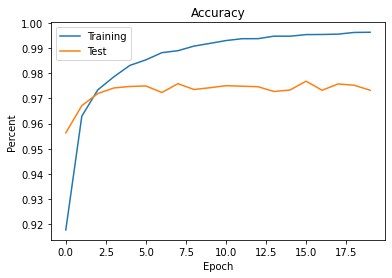

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Percent')
plt.title('Accuracy')
plt.legend(['Training', 'Test'])

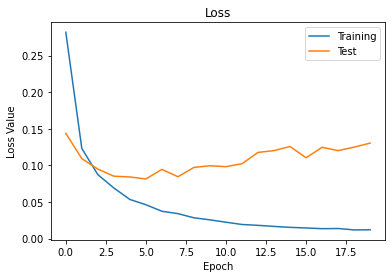

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Loss')
plt.legend(['Training', 'Test'])

In [15]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 0s 1ms/step - loss: 0.1304 - accuracy: 0.9732


[0.13036610186100006, 0.9732000231742859]